   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica
(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width

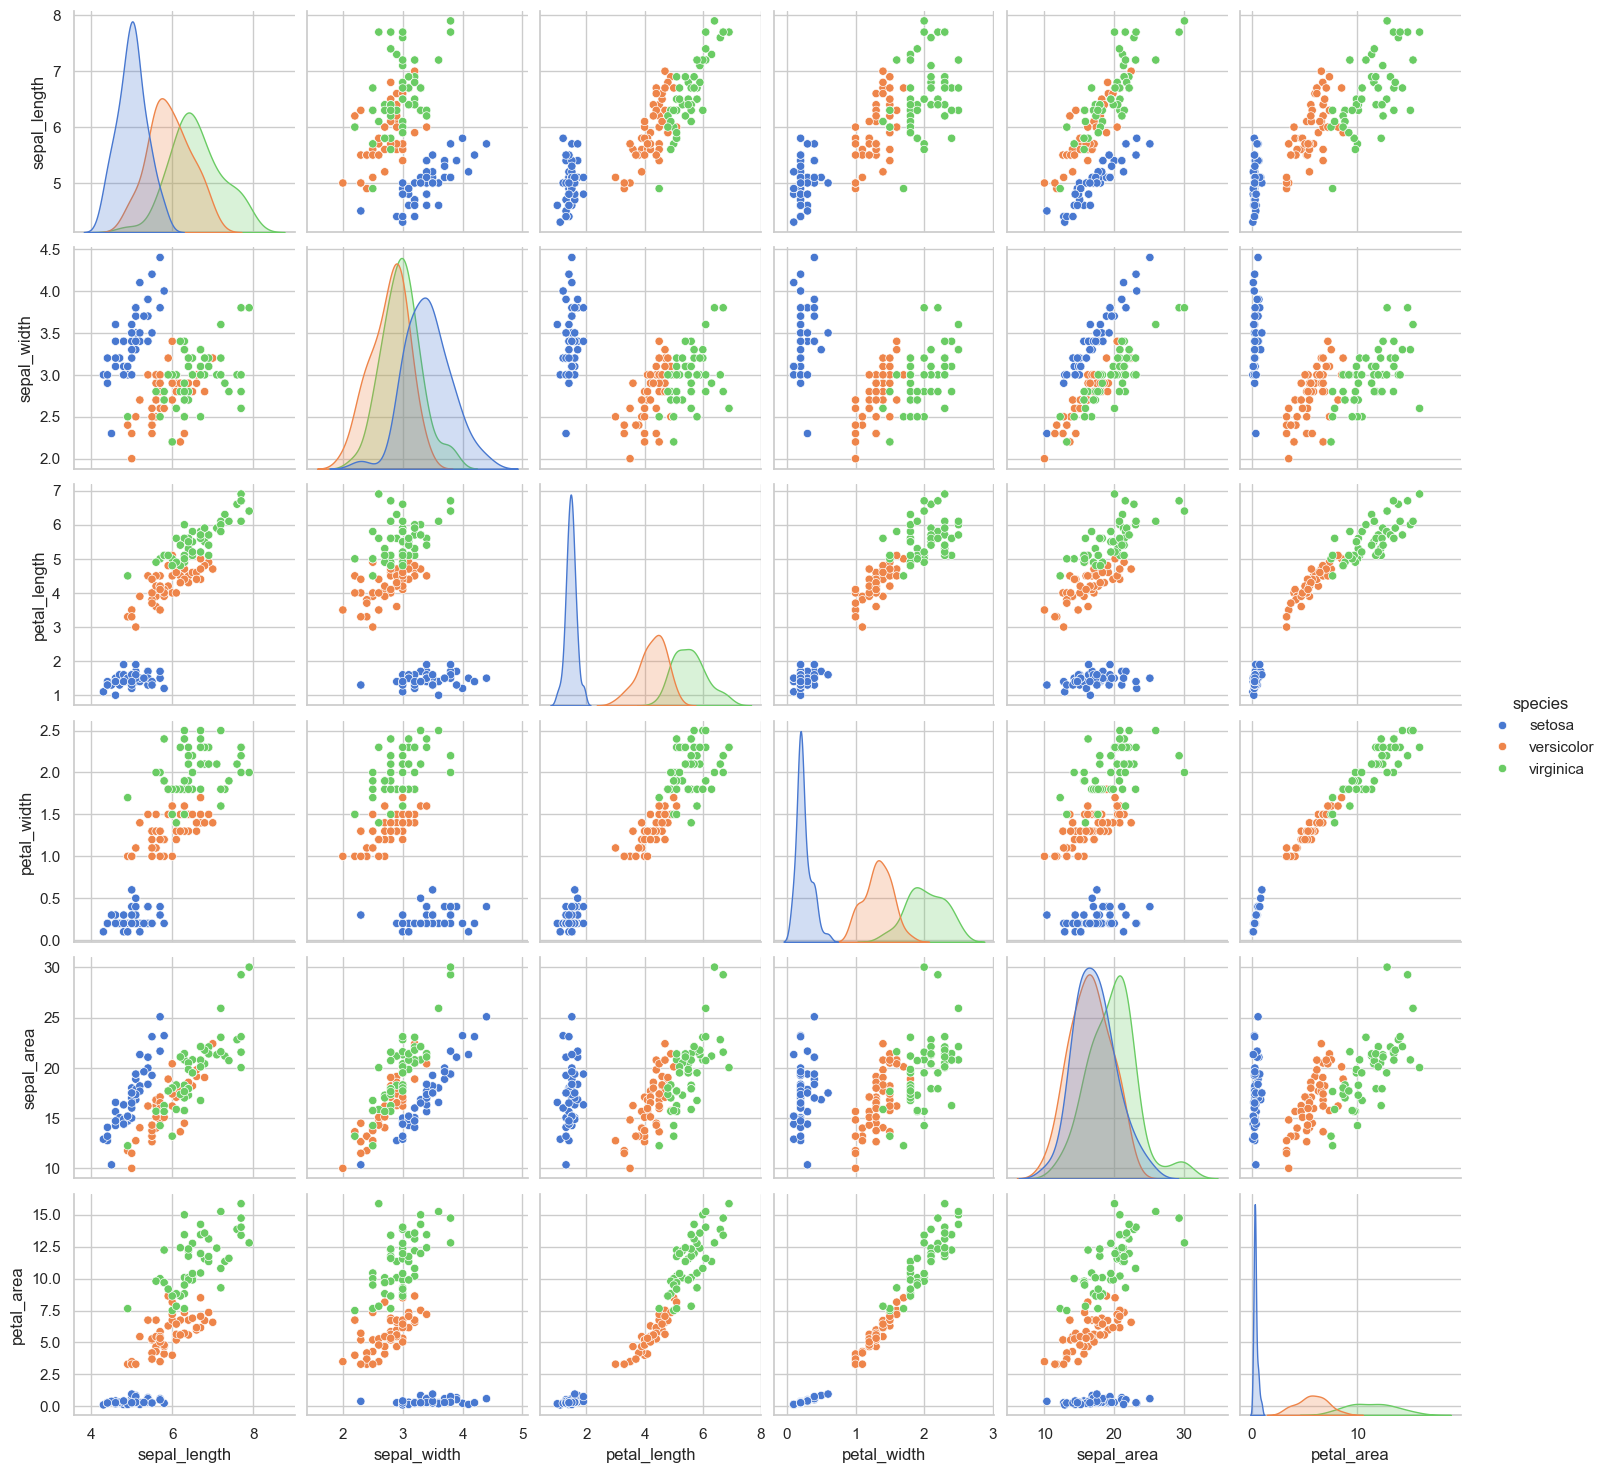

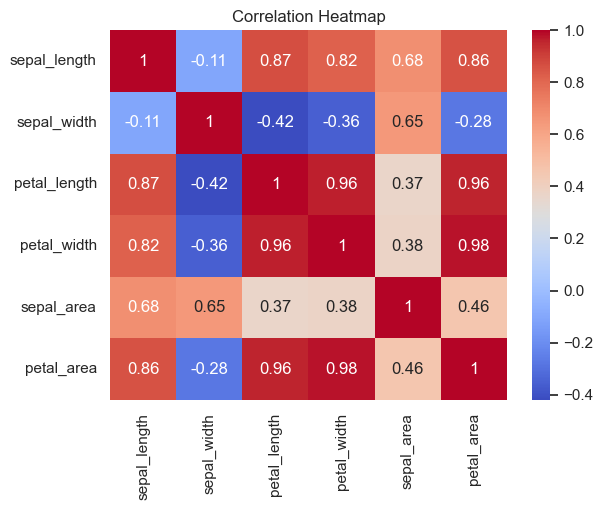

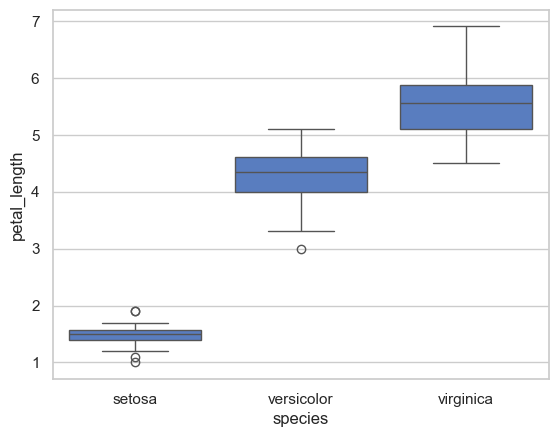

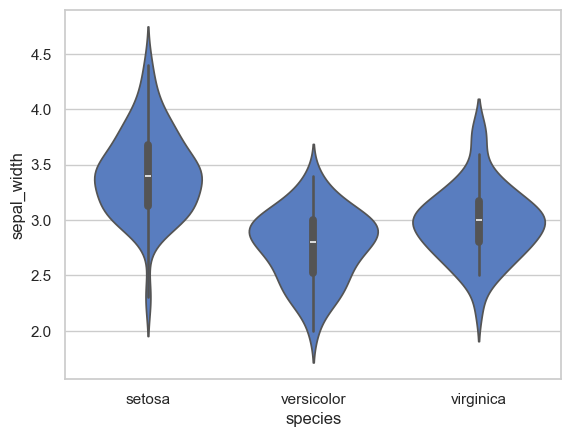

C:\Users\vamsh\AppData\Roaming\Python\Python313\site-packages\seaborn\categorical.py:3399: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


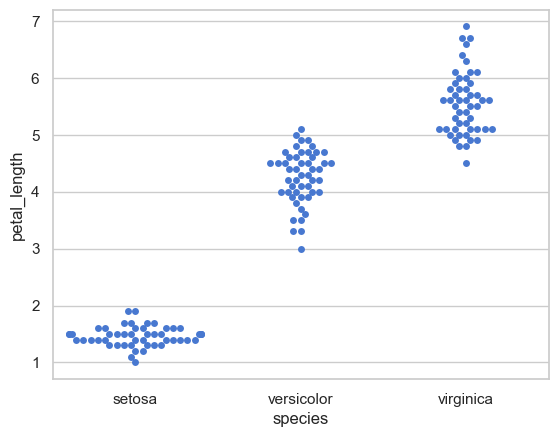

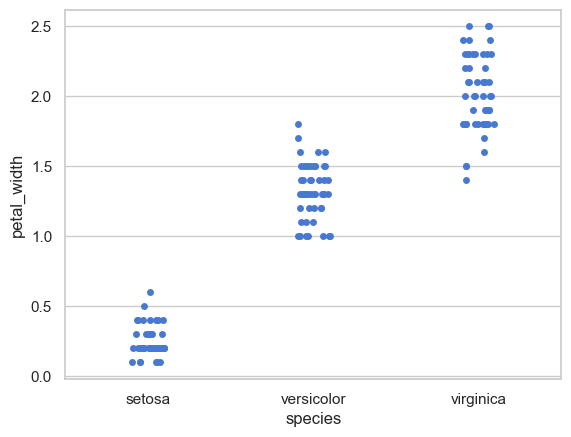

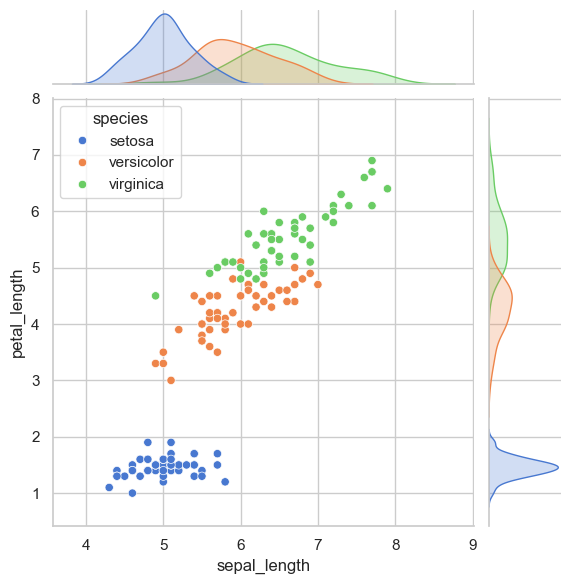

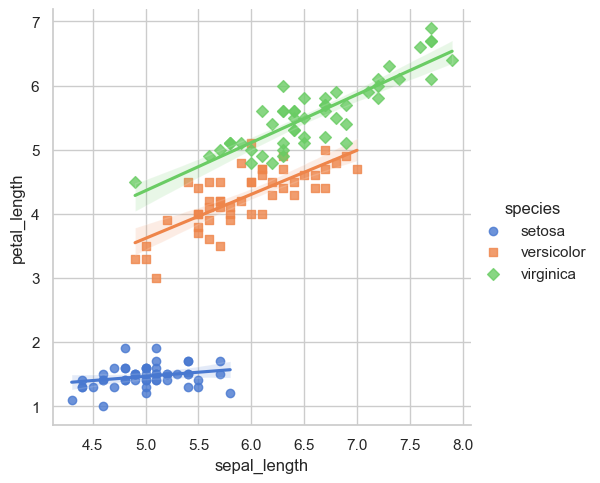

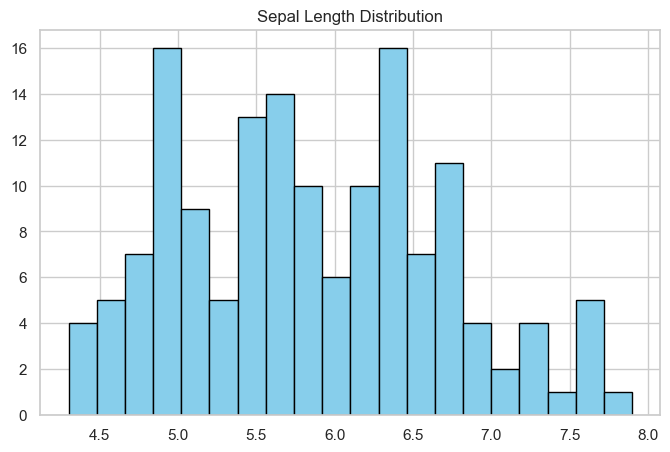

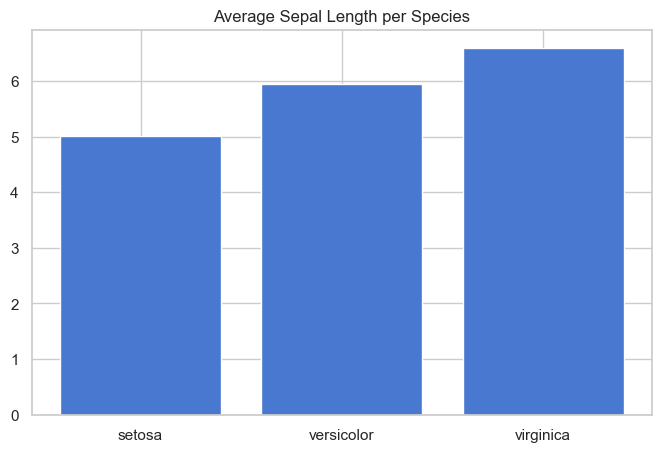

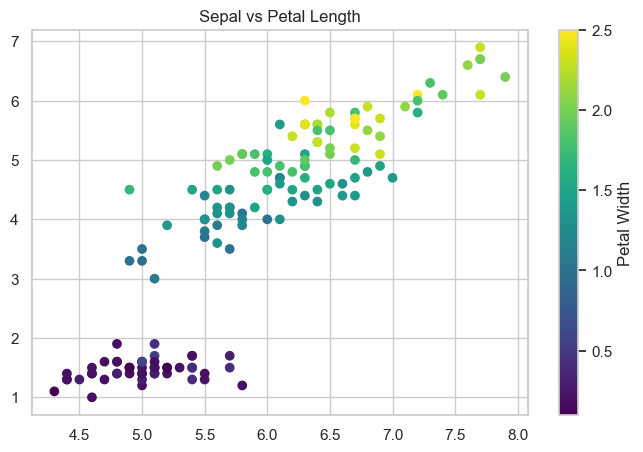

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../iris.csv")

print(df.head())
print(df.tail())
print(df.shape)
print(df.columns)
print(df.dtypes)
print(df.describe())
print(df["species"].value_counts())
print(df.isnull().sum())
print(df.corr(numeric_only=True))

arr = df[["sepal_length", "sepal_width", "petal_length", "petal_width"]].to_numpy()
print(np.mean(arr, axis=0))
print(np.median(arr, axis=0))
print(np.var(arr, axis=0))
print(np.percentile(arr, 25, axis=0))
print(np.percentile(arr, 75, axis=0))

print(df.sort_values(by="petal_length", ascending=False).head())
print(df[df["sepal_length"] > 6.5])
print(df.query("species == 'setosa' and petal_width > 0.2"))
print(df.groupby("species").mean(numeric_only=True))
print(df.groupby("species").max(numeric_only=True))
print(df.groupby("species").min(numeric_only=True))
print(df.groupby("species").median(numeric_only=True))

pivot = df.pivot_table(index="species", values=["sepal_length", "petal_length"], aggfunc=["mean", "std"])
print(pivot)

df["sepal_area"] = df["sepal_length"] * df["sepal_width"]
df["petal_area"] = df["petal_length"] * df["petal_width"]
print(df.head())

sns.set(style="whitegrid", palette="muted")

sns.pairplot(df, hue="species", diag_kind="kde")
plt.show()

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

sns.boxplot(x="species", y="petal_length", data=df)
plt.show()

sns.violinplot(x="species", y="sepal_width", data=df)
plt.show()

sns.swarmplot(x="species", y="petal_length", data=df)
plt.show()

sns.stripplot(x="species", y="petal_width", data=df, jitter=True)
plt.show()

sns.jointplot(data=df, x="sepal_length", y="petal_length", hue="species", kind="scatter")
plt.show()

sns.lmplot(data=df, x="sepal_length", y="petal_length", hue="species", markers=["o", "s", "D"])
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(df["sepal_length"], bins=20, color="skyblue", edgecolor="black")
plt.title("Sepal Length Distribution")
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(df["species"].unique(), df.groupby("species")["sepal_length"].mean())
plt.title("Average Sepal Length per Species")
plt.show()

plt.figure(figsize=(8, 5))
plt.scatter(df["sepal_length"], df["petal_length"], c=df["petal_width"], cmap="viridis")
plt.title("Sepal vs Petal Length")
plt.colorbar(label="Petal Width")
plt.show()
